In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv("C:/Datasets/advertising_click_ads.csv")

In [18]:
print("Data shape :", data.shape)
data.head(5)
# 0 = No click , 1 = click

Data shape : (1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


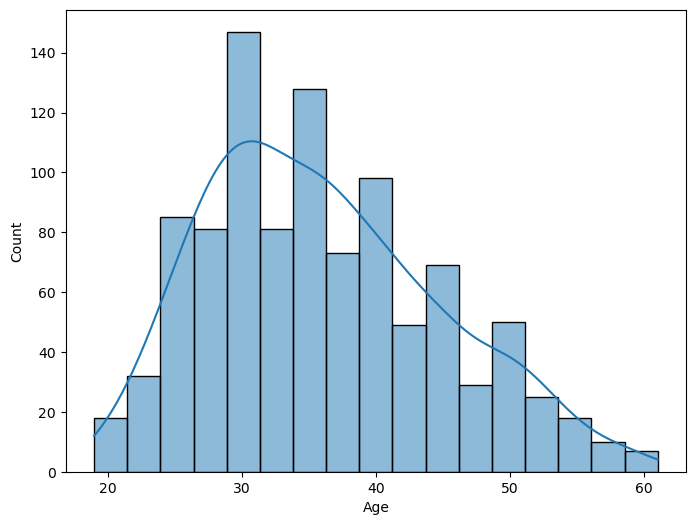

In [20]:
plt.figure(figsize = (8,6))
sns.histplot(data['Age'], kde=True)
plt.show()

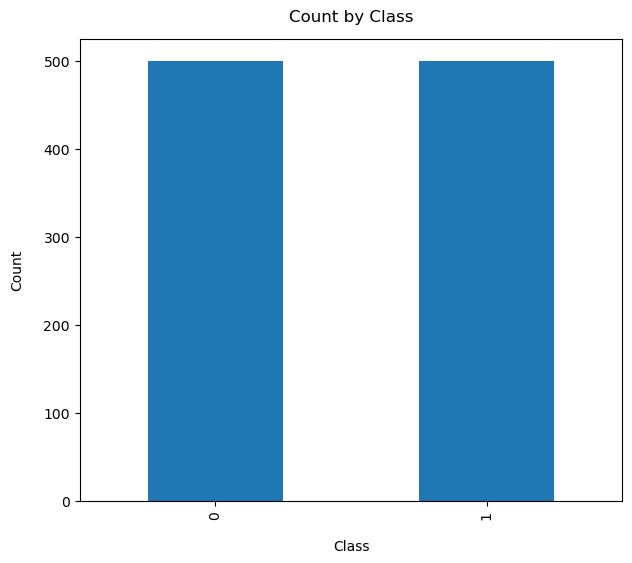

In [21]:
data['Clicked on Ad'].value_counts().plot(kind = 'bar', figsize = (7, 6))
plt.xlabel("Class", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count by Class", y = 1.02)
plt.show()

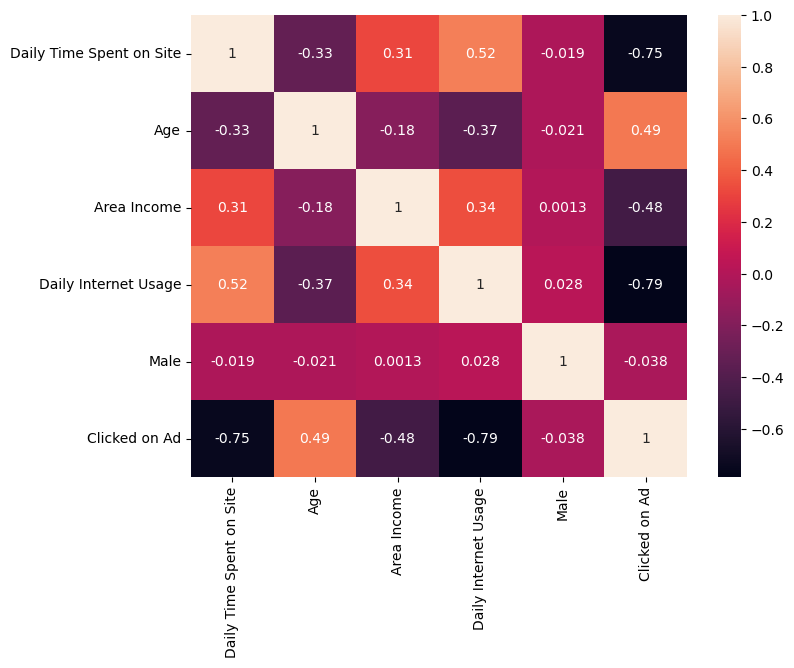

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:
X = data.drop(["Clicked on Ad","Country","City","Timestamp", "Ad Topic Line"], axis = 1)
y = data['Clicked on Ad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (800, 5)
X_test shape : (200, 5)
y_train shape : (800,)
y_test shape : (200,)


In [25]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
312,75.55,22,41851.38,169.40,0
632,70.13,31,70889.68,224.98,0
843,74.61,38,71055.22,231.28,1
269,79.15,26,62312.23,203.23,0
441,79.40,35,63966.72,236.87,0
...,...,...,...,...,...
691,87.16,37,50711.68,231.95,1
110,66.63,60,60333.38,176.98,0
585,78.60,46,41768.13,254.59,1
749,54.35,42,76984.21,164.02,0


In [26]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [27]:
y_pred = model.predict(X_test)

In [28]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8850


In [29]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")

Confusion Matrix: 
 [[88  8]
 [15 89]]


In [30]:
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_pred)}")

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        96
           1       0.92      0.86      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200

